In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

In [213]:
data = pd.read_csv('/kaggle/input/ashhhs/Capa.csv')
df = data.copy()
df

,id,Category,Capacity
0,id_1,1,120.37
1,id_2,0,60.13
2,id_3,1,119.54
3,id_4,1,120.27
4,id_5,1,120.22
...,...,...,...
1237,id_1238,0,60.00
1238,id_1239,0,59.97
1239,id_1240,0,59.89
1240,id_1241,0,59.95


In [214]:
print(df.info())
print(df['Category'].value_counts())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1242 non-null   object 
 1   Category  1242 non-null   int64  
 2   Capacity  1242 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 29.2+ KB
None
0    848
1    394
Name: Category, dtype: int64


,Category,Capacity
count,1242.000000,1242.000000
mean,0.317230,79.030233
std,0.465585,27.933111
min,0.000000,59.720000
25%,0.000000,59.970000
50%,0.000000,60.050000
75%,1.000000,119.760000
max,1.000000,121.070000


In [215]:
df_0 = df[df['Category'] == 0]
df_1 = df[df['Category'] == 1]
df_1['Capacity'].describe()

count    394.000000
mean     119.992513
std        0.309064
min      119.050000
25%      119.800000
50%      119.990000
75%      120.200000
max      121.070000
Name: Capacity, dtype: float64

---
## Partial CCL
The data above doesn't give much info, we may refer to the exercice 1

---

In [216]:
# Putting in a datetime form to work with time-series, may facilitate our job
idx = pd.date_range('2022-04-22 00:00:00', periods=24*7, freq='H')
dfps = pd.DataFrame({'values': range(24*7), 'date': idx})
dfps.drop('values', axis=1, inplace=True)
n_rows = 12095
dfps = pd.concat([dfps]*((n_rows // len(dfps))+1), axis=0)
dfps = dfps.reset_index()
dfps.drop('index', axis=1, inplace=True)
dfps

,date
0,2022-04-22 00:00:00
1,2022-04-22 01:00:00
2,2022-04-22 02:00:00
3,2022-04-22 03:00:00
4,2022-04-22 04:00:00
...,...
12091,2022-04-28 19:00:00
12092,2022-04-28 20:00:00
12093,2022-04-28 21:00:00
12094,2022-04-28 22:00:00


In [217]:
data_prec = pd.read_csv('/kaggle/input/barevvv/data.csv')
dff = data_prec.copy()
dff = pd.concat([dff, dfps], axis=1)
dff = dff.drop(['wd', 'hour', 'Unnamed: 0'], axis=1)
print(dff.describe())
dff

               load
count  12096.000000
mean       0.014318
std        0.035255
min        0.000000
25%        0.000583
50%        0.003787
75%        0.012439
max        0.631179


,id,load,date
0,SM20R-01-00000602,0.048896,2022-04-22 00:00:00
1,SM20R-01-00000602,0.046679,2022-04-22 01:00:00
2,SM20R-01-00000602,0.045662,2022-04-22 02:00:00
3,SM20R-01-00000602,0.046592,2022-04-22 03:00:00
4,SM20R-01-00000602,0.048645,2022-04-22 04:00:00
...,...,...,...
12091,SM20X-01-00000781,0.022015,2022-04-28 19:00:00
12092,SM20X-01-00000781,0.021541,2022-04-28 20:00:00
12093,SM20X-01-00000781,0.021593,2022-04-28 21:00:00
12094,SM20X-01-00000781,0.021646,2022-04-28 22:00:00


### ONLY ENTREPRISE
---
#### Logic Behind
* As a Production Site, I must be insured that, at a daily basis, I won't have any power consumption problems
* Therefore, the production site power consumption limit must be measured by the max value used in the smaller village, and that's what we will observe in the part below

#### Partial ccl
* In the plot below, it is understandable that the maximum capacity that must be handled per day is 0.63 (kWatts? KW/h? kVA?)
* This may mean, returning to our initial exercice(ex. 2 for those who don't remember naxuy) that if we have a production site, the overall value to insure the production consistency is 0.63, but it may change

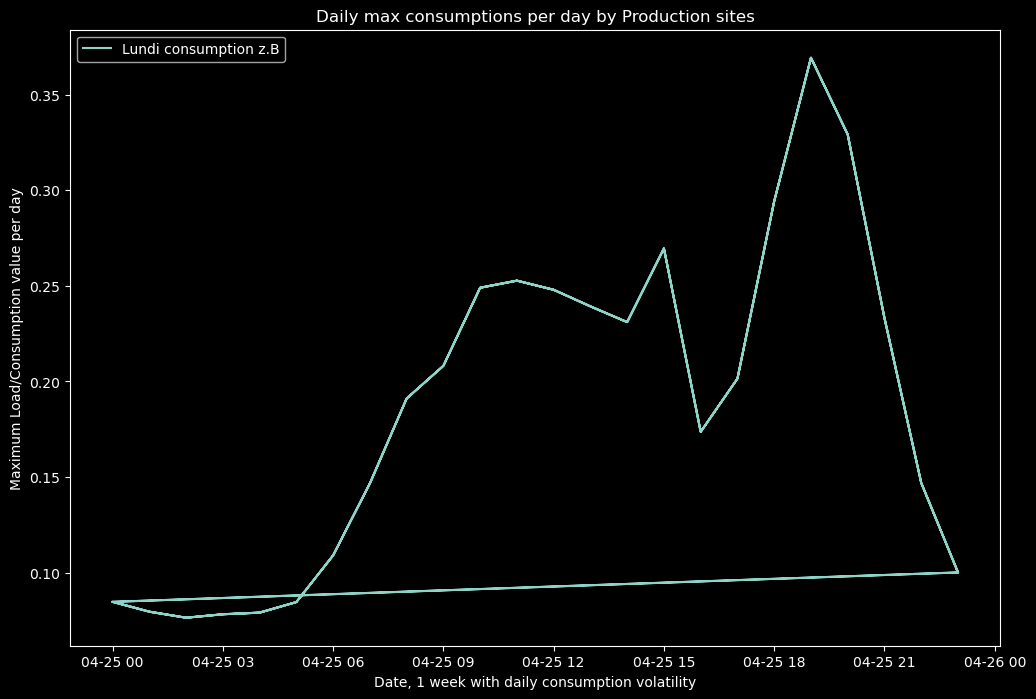

In [218]:
#D'après exo 1, only production sites are the first 3
dff_prod = dff.loc[:503, :]
dff_prod['load'] = dff_prod.groupby('date')['load'].transform('max') 
dff_prod = dff_prod.set_index('date')

plt.figure(figsize=(12, 8))
plt.title('Daily max consumptions per day by Production sites')
plt.xlabel('Date, 1 week with daily consumption volatility')
plt.ylabel('Maximum Load/Consumption value per day')
#plt.plot(dff_prod.loc[:, 'load'], label='Weekly consumption')
plt.plot(dff_prod.loc['2022-04-25 00:00:00': '2022-04-25 23:00:00', 'load'], label='Lundi consumption z.B')
plt.legend()

## Partial CCL 2
As a production site chief, I want to have full capacity because of production volatilites. this means that we may have seeasonalities or trendsing times that must require full load capacity, therefore, the day must be divided into 3 partstill noon, afternoon and nightshift, in order to get rid of incertainities
* NOON => 06h00 to 13h00
* AFTERNOON => 13h00 to 21h00
* NIGHT => 21h to 06h00

In [228]:
dff_prod2 = data_prec.copy().drop('Unnamed: 0', axis=1).loc[:503, :]
dff_prod2['load'] = dff_prod2.groupby('hour')['load'].transform('max') 
dff_prod2

# d'après les graphiques
max_noon = 0.28
max_afternoon = 0.63
max_night = 0.1

In [220]:
dff_prod2['load_noon'] = [max_noon for _ in range(0,504)]
dff_prod2['load_afternoon'] = [max_afternoon for _ in range(0,504)]
dff_prod2['load_night'] = [max_night for _ in range(0,504)]
dfp = dff_prod2.drop_duplicates(subset=['id'], keep='first')
dfp = dfp.drop(['load', 'wd', 'hour'], axis=1)
dfp

,id,load_noon,load_afternoon,load_night
0,SM20R-01-00000602,0.28,0.63,0.1
168,SM20R-01-00000623,0.28,0.63,0.1
336,SM20R-01-0000063D,0.28,0.63,0.1


## FINAL CCL FOR ENTREPRISE
---
The dataframe below will help us to give precise values for a given period of time for the optimisation of load capacity for our initial exercice, çàd if the Profile is Betweentakes, these values will be affiché
## IN OTHER WORDS
If a Profile 1 is observed, it will give the load values above (load_noon, load_afternoon, load_night)

## ONLY HOUSEHOLDS
---
#### Logic Behind
* As a Household, it is not as crucial as for production sites to have a full capacity of production site, but still a small part
* Some people have bigger houses, some of them have smaller, which means that they need more/less energy consumption capacities

#### Remarks
* We will use exactly the same logic

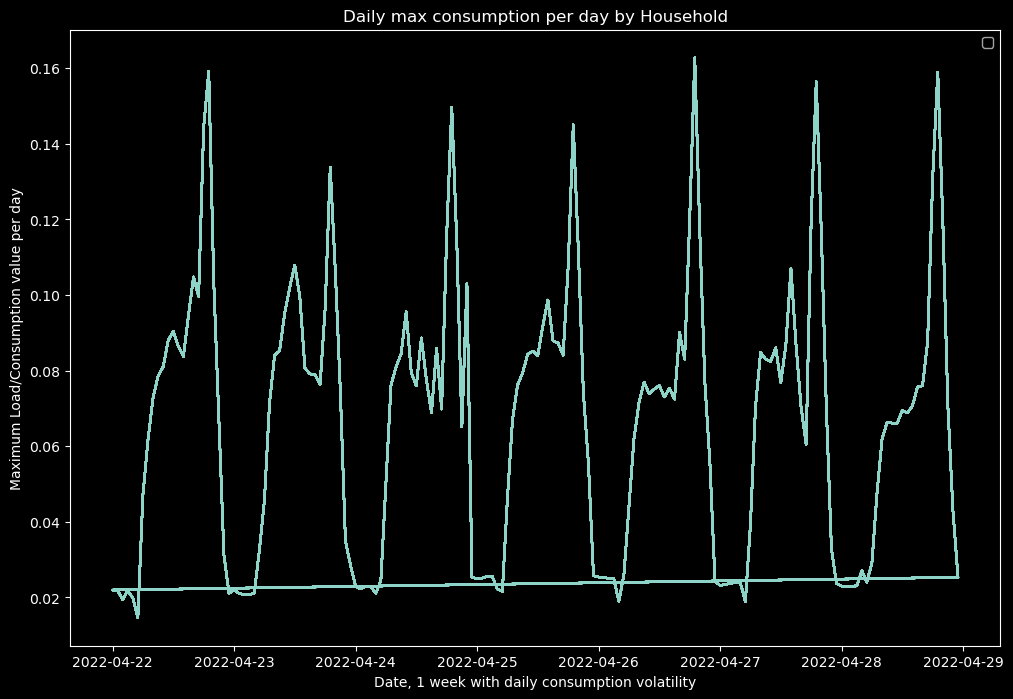

In [221]:
dff_house= dff.loc[504:, :]
dff_house['load'] = dff_house.groupby('date')['load'].transform('max') 

plt.figure(figsize=(12, 8))
plt.title('Daily max consumption per day by Household')
plt.xlabel('Date, 1 week with daily consumption volatility')
plt.ylabel('Maximum Load/Consumption value per day')
plt.legend()
plt.plot(dff_house.loc[:, 'date'], dff_house.loc[:, 'load'])


In [229]:
dff_house = data_prec.copy().drop('Unnamed: 0', axis=1).loc[504:, :]
dff_house['load'] = dff_house.groupby('hour')['load'].transform('max') 
dff_house

# d'après les graphiques
max_noonh = 0.12
max_afternoonh = 0.17
max_nighth = 0.025 

dff_house.loc[:, 'load'] = max_nighth
dff_house.loc[dff_house['hour'].between(6, 13), 'load'] = max_noonh
dff_house.loc[dff_house['hour'].between(13, 21), 'load'] = max_afternoonh
dff_house

dff_house['load_noon'] = [max_noonh for _ in range(len(dff_house['hour']))]
dff_house['load_afternoon'] = [max_afternoonh for _ in range(len(dff_house['hour']))]
dff_house['load_night'] = [max_nighth for _ in range(len(dff_house['hour']))]
dfh = dff_house.drop_duplicates(subset=['id'], keep='first')
dfh

,id,wd,hour,load,load_noon,load_afternoon,load_night
504,SM20R-01-00000725,1,0,0.025,0.12,0.17,0.025
672,SM20R-01-00000726,1,0,0.025,0.12,0.17,0.025
840,SM20R-01-0000072A,1,0,0.025,0.12,0.17,0.025
1008,SM20R-01-0000072B,1,0,0.025,0.12,0.17,0.025
1176,SM20R-01-00000731,1,0,0.025,0.12,0.17,0.025
...,...,...,...,...,...,...,...
11256,SM20R-02-00000E7E,1,0,0.025,0.12,0.17,0.025
11424,SM20X-01-00000728,1,0,0.025,0.12,0.17,0.025
11592,SM20X-01-0000074A,1,0,0.025,0.12,0.17,0.025
11760,SM20X-01-00000766,1,0,0.025,0.12,0.17,0.025


# RETURN TO OUR ROOTS
---
D'après what we did we may deduce that 
* if the Profile is 1, we refer to the dataframe dfp
* if the Profile is 0, we refer to the dataframe dfh

In [224]:
df

,id,Category,Capacity
0,id_1,1,120.37
1,id_2,0,60.13
2,id_3,1,119.54
3,id_4,1,120.27
4,id_5,1,120.22
...,...,...,...
1237,id_1238,0,60.00
1238,id_1239,0,59.97
1239,id_1240,0,59.89
1240,id_1241,0,59.95


In [230]:
def set_load_times(row, max_noon, max_afternoon, max_night, max_noonh, max_afternoonh, max_nighth):
    if row['Category'] == 1:
        row['load_noon'] = max_noon
        row['load_afternoon'] = max_afternoon
        row['load_night'] = max_night
    else:
        row['load_noon'] = max_noonh
        row['load_afternoon'] = max_afternoonh
        row['load_night'] = max_nighth
    return row

df = df.apply(set_load_times, axis=1, args=(max_noon, max_afternoon, max_night, max_noonh, max_afternoonh, max_nighth))
df

,id,Category,Capacity,load_noon,load_afternoon,load_night
0,id_1,1,120.37,0.28,0.63,0.100
1,id_2,0,60.13,0.12,0.17,0.025
2,id_3,1,119.54,0.28,0.63,0.100
3,id_4,1,120.27,0.28,0.63,0.100
4,id_5,1,120.22,0.28,0.63,0.100
...,...,...,...,...,...,...
1237,id_1238,0,60.00,0.12,0.17,0.025
1238,id_1239,0,59.97,0.12,0.17,0.025
1239,id_1240,0,59.89,0.12,0.17,0.025
1240,id_1241,0,59.95,0.12,0.17,0.025
